<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Proyecto Final

## Liga de fútbol femenina. Una mirada desde las redes sociales, con perspectiva de género.

<img src='https://i.pinimg.com/564x/ed/3b/4e/ed3b4e1a2f4dfa805a8442607229e9cd.jpg'>

#### Como el deporte más popular alrededor del mundo, el fútbol puede ser el ejemplo más grande de las disparidades actuales en el deporte. A pesar de la presencia de las mujeres en las canchas desde principios del siglo XX, los gobiernos y las asociaciones de fútbol han eliminado de manera proactiva su capacidad de participar en el juego bonito a través de estereotipos de género, poca inversión, oportunidades profesionales precarias y faltas de respeto.

# Contenido

## 1: Obtención de los datos por medio de web scrapping en Twitter 
## 2: Limpieza de los datos 
## 3: Modelo LDA
## 4: Nubes de palabras
## 5: Análisis de sentimientos
## 6: Visualización de los datos

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
from nltk.corpus import words
import nltk
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
from dfply import *
import re

## 1: Obtención de los datos por medio de web scrapping en Twitter 

In [4]:
maxTweets = 400 
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#ligafemeninaxwin ').get_items()) :
        if i > maxTweets :
            break
        print(tweet)
        print(tweet.date)
        print(tweet.content)
        print("*"*127)
        print()

https://twitter.com/ElCapo711/status/1369076941962280962
2021-03-09 00:05:53+00:00
@WinSportsTV #LigaFemeninaXWin @JFCadavid Juan no podemos olvidar  Luz Aydee "LaTotona" Grisales en bello mucho tiempo trabajando con @FormasIntimas y ma mejor guardameta Sandra Sepulveda del @DIMFI_Oficial saludos desde Medellín Colegas!! 
😎👍🇰🇭
*******************************************************************************************************************************

https://twitter.com/FlorOlarte10/status/1368315263695941643
2021-03-06 21:39:15+00:00
#ligafemeninaxwin la mejor  jugadora femenina es LEICY SANTOS
*******************************************************************************************************************************

https://twitter.com/LucenErnesto/status/1338283291791732737
2020-12-14 00:42:55+00:00
¡Felicitaciones campeonas! Todo el reconocimiento para @SantaFe por conseguir el título de la #LIGAFEMENINAxWIN 👏🏼🇨🇴 gran trabajo del @AmericaCaliFem por competir al más alto nive

In [5]:
bd_twitter = pd.DataFrame(columns=('links', 'fecha', 'tweet'))

In [6]:
str(tweet.date)

'2020-12-07 20:39:18+00:00'

In [7]:
maxTweets = 400  
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#ligafemeninaxwin ').get_items()) :
        if i > maxTweets :
            break
        bd_twitter.loc[len(bd_twitter)]=[str(tweet),tweet.date,tweet.content]  

In [8]:
bd_twitter

,links,fecha,tweet
0,https://twitter.com/ElCapo711/status/136907694...,2021-03-09 00:05:53+00:00,@WinSportsTV #LigaFemeninaXWin @JFCadavid Juan...
1,https://twitter.com/FlorOlarte10/status/136831...,2021-03-06 21:39:15+00:00,#ligafemeninaxwin la mejor jugadora femenina ...
2,https://twitter.com/LucenErnesto/status/133828...,2020-12-14 00:42:55+00:00,¡Felicitaciones campeonas! Todo el reconocimie...
3,https://twitter.com/conroca20c09/status/133828...,2020-12-14 00:40:37+00:00,@AmericaCaliFem Para Eso Le Robaron El Partido...
4,https://twitter.com/hatedlifedie/status/133828...,2020-12-14 00:39:44+00:00,#lopagarasumadre #lopagarasumadre #lopagarasum...
...,...,...,...
396,https://twitter.com/iOscarParra/status/1336047...,2020-12-07 20:39:57+00:00,#LIGAFEMENINAxWIN Siguiendo a las embajadoras...
397,https://twitter.com/posso_vivi/status/13360478...,2020-12-07 20:39:53+00:00,#LALIGAxWIN #LigaBetplay #LIGAFEMENINAxWIN \n...
398,https://twitter.com/Cristhianboli29/status/133...,2020-12-07 20:39:44+00:00,#LIGAFEMENINAxWIN apoyando a mi Millos desde C...
399,https://twitter.com/ElManuBaquero/status/13360...,2020-12-07 20:39:23+00:00,Increíble la desatención de la zaga de @MFCFem...


## 2: Limpieza de los datos / Pre-procesamiento

In [9]:
import re 

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [10]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto 

bd_twitter['PP'] = bd_twitter['tweet'].apply(lambda texto: pre_procesado(texto))

bd_twitter.head()

,links,fecha,tweet,PP
0,https://twitter.com/ElCapo711/status/136907694...,2021-03-09 00:05:53+00:00,@WinSportsTV #LigaFemeninaXWin @JFCadavid Juan...,"[winsportstv, ligafemeninaxwin, jfcadavid, jua..."
1,https://twitter.com/FlorOlarte10/status/136831...,2021-03-06 21:39:15+00:00,#ligafemeninaxwin la mejor jugadora femenina ...,"[ligafemeninaxwin, mejor, jugadora, femenina, ..."
2,https://twitter.com/LucenErnesto/status/133828...,2020-12-14 00:42:55+00:00,¡Felicitaciones campeonas! Todo el reconocimie...,"[felicitaciones, campeonas, reconocimiento, sa..."
3,https://twitter.com/conroca20c09/status/133828...,2020-12-14 00:40:37+00:00,@AmericaCaliFem Para Eso Le Robaron El Partido...,"[americacalifem, robaron, partido, mfcfem, cal..."
4,https://twitter.com/hatedlifedie/status/133828...,2020-12-14 00:39:44+00:00,#lopagarasumadre #lopagarasumadre #lopagarasum...,"[lopagarasumadre, lopagarasumadre, lopagarasum..."


## 3:Modelo LDA

In [102]:
dictionary = Dictionary(bd_twitter['PP'].values)

In [103]:
dictionary.filter_extremes(no_below=5, no_above=0.5) 

In [104]:
# Corpus
corpus = [dictionary.doc2bow(text) for text in bd_twitter['PP'].values]

In [105]:
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5, passes=10)

In [106]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [125]:
d = dictionary.doc2bow(["malas jugadoras", "juego", "mujeres","femenina"])
topics = [(cluster[0]+1, cluster[1]) for cluster in model.get_document_topics(d)]
topics

[(1, 0.050007205),
 (2, 0.050497454),
 (3, 0.7994909),
 (4, 0.050002616),
 (5, 0.05000179)]

## 4: Nubes de palabras / Visualizaciones

In [116]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


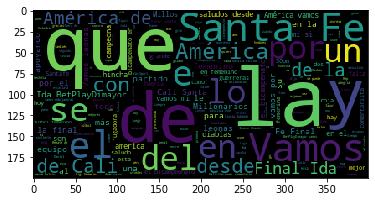

In [11]:
palabras = bd_twitter.clean.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

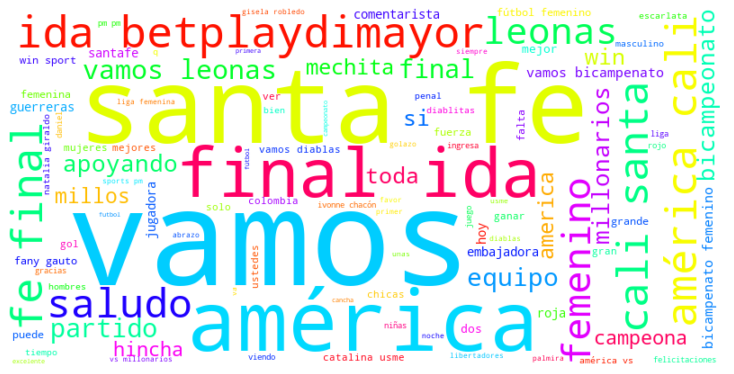

In [22]:
palabras = bd_twitter.PP.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="hsv",
                      stopwords=stopwords, collocations=True).generate(palabras)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

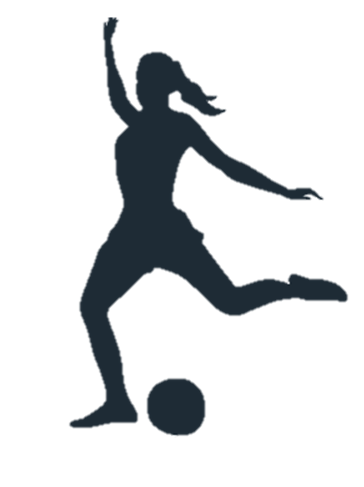

In [18]:
jugadora = PIL.Image.open("Imagen.png")
display(jugadora)

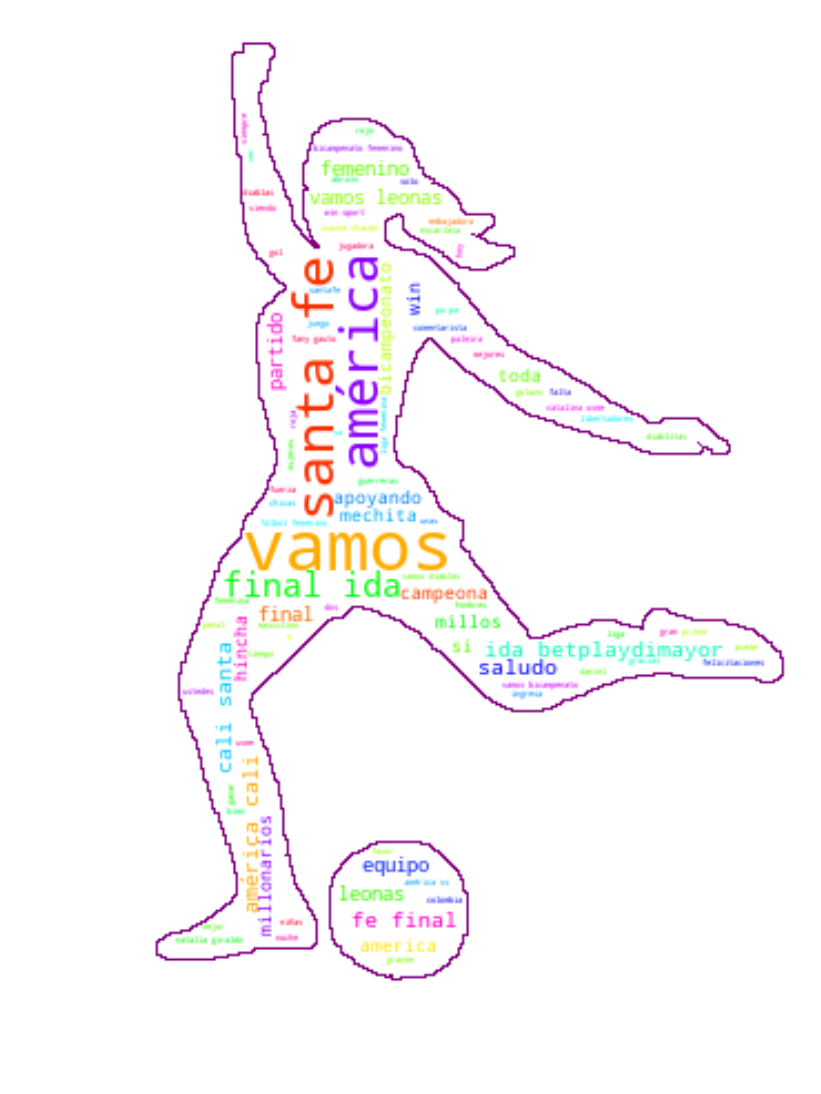

In [21]:
mask = np.array(jugadora)
palabras = bd_twitter.PP.str.cat(sep=' ')

wordcloud = WordCloud(random_state=1234, width=500, height=500,
                      max_font_size=200, max_words=150,
                      background_color='white', colormap='hsv',
                      stopwords=stopwords, 
                      mask=mask, contour_width=0.5, contour_color='purple').generate(palabras) 
wordcloud.to_file("Imagen.png")


plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 5: Análisis de sentimientos

In [12]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
from flair.models import TextClassifier
from flair.data import Sentence

C:\Users\johan\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\johan\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
pip install sentiment-analysis-spanish

In [15]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

bd_twitter['sent_flair'] = bd_twitter['PP'].apply(lambda valor: sent_flair(valor))
bd_twitter.head()

2021-05-26 08:19:40,873 loading file C:\Users\johan\.flair\models\sentiment-en-mix-distillbert_4.pt


,links,fecha,tweet,PP,sent_flair
0,https://twitter.com/ElCapo711/status/136907694...,2021-03-09 00:05:53+00:00,@WinSportsTV #LigaFemeninaXWin @JFCadavid Juan...,"[winsportstv, ligafemeninaxwin, jfcadavid, jua...",0.999068
1,https://twitter.com/FlorOlarte10/status/136831...,2021-03-06 21:39:15+00:00,#ligafemeninaxwin la mejor jugadora femenina ...,"[ligafemeninaxwin, mejor, jugadora, femenina, ...",0.798522
2,https://twitter.com/LucenErnesto/status/133828...,2020-12-14 00:42:55+00:00,¡Felicitaciones campeonas! Todo el reconocimie...,"[felicitaciones, campeonas, reconocimiento, sa...",0.995355
3,https://twitter.com/conroca20c09/status/133828...,2020-12-14 00:40:37+00:00,@AmericaCaliFem Para Eso Le Robaron El Partido...,"[americacalifem, robaron, partido, mfcfem, cal...",0.902571
4,https://twitter.com/hatedlifedie/status/133828...,2020-12-14 00:39:44+00:00,#lopagarasumadre #lopagarasumadre #lopagarasum...,"[lopagarasumadre, lopagarasumadre, lopagarasum...",0.950064


In [16]:
bd_twitter[['fecha','PP', 'sent_flair']].sort_values('sent_flair')

,fecha,PP,sent_flair
390,2020-12-07 20:40:52+00:00,"[ligafemeninaxwin, penal]",-0.999871
208,2020-12-07 22:32:24+00:00,"[ganó, americafemenino, llorar, bastardo, inút...",-0.999830
290,2020-12-07 21:46:24+00:00,"[vamos, millos, ligafemeninaxwin, si, puede, v...",-0.999640
43,2020-12-13 23:36:17+00:00,"[ligafemeninaxwin, nadie, vió, penal, balón, s...",-0.999541
232,2020-12-07 22:23:10+00:00,"[ligafemeninaxwin, américa, vamos, bicampenato...",-0.999457
...,...,...,...
299,2020-12-07 21:42:47+00:00,"[ligafemeninaxwin, winsportstv, vamos, embajad...",0.999171
63,2020-12-11 03:41:42+00:00,"[ligafemeninaxwin, gustó, declaraciones, jugad...",0.999298
45,2020-12-13 23:14:34+00:00,"[winsportstv, deberían, esforzarse, narradores...",0.999339
112,2020-12-11 01:49:30+00:00,"[final, primer, tiempo, américa, cali, santa, ...",0.999427


## 6: Visualización de los datos

## tuits POSITIVOS

In [42]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [17]:
positivos= bd_twitter >> filter_by(X.sent_flair>0) 
positivos

,links,fecha,tweet,PP,sent_flair
0,https://twitter.com/ElCapo711/status/136907694...,2021-03-09 00:05:53+00:00,@WinSportsTV #LigaFemeninaXWin @JFCadavid Juan...,"[winsportstv, ligafemeninaxwin, jfcadavid, jua...",0.999068
1,https://twitter.com/FlorOlarte10/status/136831...,2021-03-06 21:39:15+00:00,#ligafemeninaxwin la mejor jugadora femenina ...,"[ligafemeninaxwin, mejor, jugadora, femenina, ...",0.798522
2,https://twitter.com/LucenErnesto/status/133828...,2020-12-14 00:42:55+00:00,¡Felicitaciones campeonas! Todo el reconocimie...,"[felicitaciones, campeonas, reconocimiento, sa...",0.995355
3,https://twitter.com/conroca20c09/status/133828...,2020-12-14 00:40:37+00:00,@AmericaCaliFem Para Eso Le Robaron El Partido...,"[americacalifem, robaron, partido, mfcfem, cal...",0.902571
4,https://twitter.com/hatedlifedie/status/133828...,2020-12-14 00:39:44+00:00,#lopagarasumadre #lopagarasumadre #lopagarasum...,"[lopagarasumadre, lopagarasumadre, lopagarasum...",0.950064
...,...,...,...,...,...
395,https://twitter.com/juanmaoscar/status/1336047...,2020-12-07 20:39:58+00:00,#LIGAFEMENINAxWIN Vamos que vamos Mis Chicas. ...,"[ligafemeninaxwin, vamos, vamos, chicas, bicam...",0.607247
396,https://twitter.com/iOscarParra/status/1336047...,2020-12-07 20:39:57+00:00,#LIGAFEMENINAxWIN Siguiendo a las embajadoras...,"[ligafemeninaxwin, siguiendo, embajadoras, str...",0.668123
397,https://twitter.com/posso_vivi/status/13360478...,2020-12-07 20:39:53+00:00,#LALIGAxWIN #LigaBetplay #LIGAFEMENINAxWIN \n...,"[laligaxwin, ligabetplay, ligafemeninaxwin, tu...",0.850130
398,https://twitter.com/Cristhianboli29/status/133...,2020-12-07 20:39:44+00:00,#LIGAFEMENINAxWIN apoyando a mi Millos desde C...,"[ligafemeninaxwin, apoyando, millos, cali, vam...",0.977571


In [18]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    positivos = regex.findall(r'\X', text)
    for word in positivos:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

positivos['emojis'] = positivos['tweet'].apply(lambda text: get_emojis(text))

In [19]:
positivos.head()

,links,fecha,tweet,PP,sent_flair,emojis
0,https://twitter.com/ElCapo711/status/136907694...,2021-03-09 00:05:53+00:00,@WinSportsTV #LigaFemeninaXWin @JFCadavid Juan...,"[winsportstv, ligafemeninaxwin, jfcadavid, jua...",0.999068,"[😎, 👍]"
1,https://twitter.com/FlorOlarte10/status/136831...,2021-03-06 21:39:15+00:00,#ligafemeninaxwin la mejor jugadora femenina ...,"[ligafemeninaxwin, mejor, jugadora, femenina, ...",0.798522,[]
2,https://twitter.com/LucenErnesto/status/133828...,2020-12-14 00:42:55+00:00,¡Felicitaciones campeonas! Todo el reconocimie...,"[felicitaciones, campeonas, reconocimiento, sa...",0.995355,[👏🏼]
3,https://twitter.com/conroca20c09/status/133828...,2020-12-14 00:40:37+00:00,@AmericaCaliFem Para Eso Le Robaron El Partido...,"[americacalifem, robaron, partido, mfcfem, cal...",0.902571,[]
4,https://twitter.com/hatedlifedie/status/133828...,2020-12-14 00:39:44+00:00,#lopagarasumadre #lopagarasumadre #lopagarasum...,"[lopagarasumadre, lopagarasumadre, lopagarasum...",0.950064,[]


In [20]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [21]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(positivos.emojis.values,[])).keys(),Counter(sum(positivos.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(5)

,emoji,cnt
17,⚽️,47
15,🏆,33
24,🆚,30
22,⏱️,29
18,👹,23


In [23]:
trace = go.Bar(x=temp_emojis.emoji.values[:5],
               y=temp_emojis.cnt.values[:5])

layout = go.Layout(title='Emojis Positivos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [36]:
positivos['fecha'] = positivos.fecha
temp = pd.DataFrame(positivos.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
0,2020-12-07,158
5,2020-12-08,7
4,2020-12-09,10
6,2020-12-10,2
1,2020-12-11,96
2,2020-12-13,31
3,2020-12-14,20
8,2021-03-06,1
7,2021-03-09,1


In [38]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [44]:
trace = go.Scatter(x=temp.fecha.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.fecha.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Días',
                   line={'color':'#1DA1F2'})

layout = go.Layout(title='Número de tuits por día')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## tuits NEGATIVOS

In [24]:
negativos= bd_twitter >> filter_by(X.sent_flair<0) 
negativos.head()

,links,fecha,tweet,PP,sent_flair
8,https://twitter.com/issa_ave/status/1338279904...,2020-12-14 00:29:27+00:00,Yo te quiero @SantaFe ♥️🦁🔥 #LIGAFEMENINAxWIN h...,"[quiero, santafe, ligafemeninaxwin, https, t, ...",-0.930527
14,https://twitter.com/DeportesTotal8/status/1338...,2020-12-14 00:16:29+00:00,🥳🥳🥳CAMPEONAS🥳🥳🥳\nIndependiente Santa Fe femeni...,"[campeonas, independiente, santa, fe, femenino...",-0.946711
28,https://twitter.com/soniaramirezad/status/1338...,2020-12-13 23:55:28+00:00,@fpcwin \nVamos LEONAS a ser CAMPEONAS como la...,"[fpcwin, vamos, leonas, ser, campeonas, primer...",-0.568177
41,https://twitter.com/CRISTHIANBAR/status/133826...,2020-12-13 23:39:16+00:00,"#LIGAFEMENINAxWIN Vamos Santa Fe, queremos la ...","[ligafemeninaxwin, vamos, santa, fe, queremos,...",-0.633194
43,https://twitter.com/aldobeltrancx/status/13382...,2020-12-13 23:36:17+00:00,#LIGAFEMENINAxWIN Nadie vió el penal sin balón...,"[ligafemeninaxwin, nadie, vió, penal, balón, s...",-0.999541


In [25]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    negativos = regex.findall(r'\X', text)
    for word in negativos:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

negativos['emojis'] = negativos['tweet'].apply(lambda text: get_emojis(text))

In [26]:
negativos.head()

,links,fecha,tweet,PP,sent_flair,emojis
8,https://twitter.com/issa_ave/status/1338279904...,2020-12-14 00:29:27+00:00,Yo te quiero @SantaFe ♥️🦁🔥 #LIGAFEMENINAxWIN h...,"[quiero, santafe, ligafemeninaxwin, https, t, ...",-0.930527,"[♥️, 🦁, 🔥]"
14,https://twitter.com/DeportesTotal8/status/1338...,2020-12-14 00:16:29+00:00,🥳🥳🥳CAMPEONAS🥳🥳🥳\nIndependiente Santa Fe femeni...,"[campeonas, independiente, santa, fe, femenino...",-0.946711,"[🥳, 🥳, 🥳, 🥳, 🥳, 🥳]"
28,https://twitter.com/soniaramirezad/status/1338...,2020-12-13 23:55:28+00:00,@fpcwin \nVamos LEONAS a ser CAMPEONAS como la...,"[fpcwin, vamos, leonas, ser, campeonas, primer...",-0.568177,[]
41,https://twitter.com/CRISTHIANBAR/status/133826...,2020-12-13 23:39:16+00:00,"#LIGAFEMENINAxWIN Vamos Santa Fe, queremos la ...","[ligafemeninaxwin, vamos, santa, fe, queremos,...",-0.633194,[]
43,https://twitter.com/aldobeltrancx/status/13382...,2020-12-13 23:36:17+00:00,#LIGAFEMENINAxWIN Nadie vió el penal sin balón...,"[ligafemeninaxwin, nadie, vió, penal, balón, s...",-0.999541,[]


In [27]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [29]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(negativos.emojis.values,[])).keys(),Counter(sum(negativos.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
3,🥳,6
5,👹,4
19,💙,4
13,⚽,4
18,😍,3


In [30]:
trace = go.Bar(x=temp_emojis.emoji.values[:10],
               y=temp_emojis.cnt.values[:10])

layout = go.Layout(title='Emojis Negativos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [48]:
negativos['fecha'] = negativos.fecha
temp = pd.DataFrame(negativos.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
0,2020-12-07,54
6,2020-12-08,1
3,2020-12-09,4
4,2020-12-10,3
2,2020-12-11,5
1,2020-12-13,6
5,2020-12-14,2


In [49]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [50]:
trace = go.Scatter(x=temp.fecha.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.fecha.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Días',
                   line={'color':'#1DA1F2'})

layout = go.Layout(title='Número de tuits por día')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)